## import

In [114]:
# 데이터 분석
import pandas as pd
import numpy as np

In [115]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [116]:
# 정규표현식
import re

In [117]:
# 형태소분석
from pecab import PeCab

## 품사태그표 연습

* 품사태그표 :   
https://konlpy.org/ko/v0.6.0/morph/   
https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [118]:
corpus_text = '중국집에서 짜장면을 시켰어요'

In [119]:
pecab_pos = pecab.pos(corpus_text) # 형태소 분석
pecab_pos

[('중국', 'NNP'),
 ('집', 'NNG'),
 ('에서', 'JKB'),
 ('짜장면', 'NNG'),
 ('을', 'JKO'),
 ('시켰', 'VV+EP'),
 ('어요', 'EF')]

In [120]:
# 명사만 추출
pecab.nouns(corpus_text)

['중국', '집', '짜장면']

In [121]:
for text, pos in pecab_pos:
    if not pos.startswith('J'):
        print(text, pos)

중국 NNP
집 NNG
짜장면 NNG
시켰 VV+EP
어요 EF


In [122]:
join_text = []
for text, pos in pecab_pos:
    if not pos.startswith('J'):
        # print(text, pos)
        join_text.append(text)
        
print(join_text)
print(" ".join(join_text))

['중국', '집', '짜장면', '시켰', '어요']
중국 집 짜장면 시켰 어요


### 명사, 동사, 형용사 추출하는 함수 get_nouns_verbs_adjectives()

In [123]:
# 명사, 동사, 형용사 추출하기
def get_nouns_verbs_adjectives(text):
    pecab = PeCab() # pecab 객체 생성
    pecab_pos = pecab.pos(text)
    join_text = []
    for text, pos in pecab_pos:
        if pos.startswith('N') or pos == 'VV' or pos == 'VA':
            join_text.append(text)
    return " ".join(join_text)

## 정규표현식 import

In [124]:
# 형태소 분석 전 정제된 데이터면 좋으니
# 정규표현식
import re

In [125]:
# # 정규표현식
# # 숫자 제거 [0-9], \d, [^0-9], \D
# # 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]
# #df['title'].str.replace('[0-9]', '', regex=True)
# df['title2'] = df['title'].str.replace(r'\d','',regex=True)
# df['title3'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]',' ',regex=True)
# df['title4'] = df['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

## 데이터 불러오기

In [126]:
# 데이터 불러오기
url = 'https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
print(url)
df = pd.read_json(url)
df.shape

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


(45678, 7)

In [127]:
df = df[['title', 'label']]
df.head(2)

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화


### 정규표현식을 이용한 함수 extract_korean()

In [128]:
# 한글만 추출 + 2개이상 공백 1개로 변환
def extract_korean(text):
    # 한글만 추출
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',text)
    # 공백 2개 이상인 경우 1개로 변환
    text = re.sub(r'\s+',' ',text)
    return text


### extract_korean() 사용

In [129]:
df['title'].map(lambda title:extract_korean(title))

0              유튜브 내달 일까지 크리에이터 지원 공간 운영
1                어버이날 맑다가 흐려져 남부지방 옅은 황사
2              내년부터 국가 평가 때 논문건수는 반영 않는다
3        김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4          회색인간 작가 김동식 양심고백 등 새 소설집 권 출간
                      ...               
45673       사우디 아람코 주요 석유시설 유전 드론 공격에 화재
45674     박기원 감독 눈치 보지 말고 비예나 눈치 본 건 아닌데
45675      아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 
45676       트럼프 미중 무역협상 단계 합의 서명식 가질 것종합
45677        극적 역전승 도로공사 칼텍스 꺾고 년 연속 챔프 
Name: title, Length: 45678, dtype: object

### 위에서 만든 함수 2개 같이 사용

In [130]:
df['title'].head(2).map(lambda title: extract_korean(title)).map(lambda title: get_nouns_verbs_adjectives(title))

0    유튜브 내달 일 크리에이터 지원 공간 운영
1          어버이날 맑 남부 지방 옅 황사
Name: title, dtype: object

In [131]:
# # 이렇게 생략 가능
# # 그리고 파생열로 추가
# df['title2'] = df['title'].map(extract_korean).map(get_nouns_verbs_adjectives)
## -> 시간이 오래걸림

### 시간이 오래걸리는 작업시 시각적으로 진행상황 수치로(%)로 보여준다.

In [132]:
# 시간이 오래 걸리는 작업시 시각적으로 진행상황 수치로( %) 보여준다.
from tqdm import tqdm
tqdm.pandas()

In [133]:
df['title2'] = df['title'].progress_map(extract_korean).progress_map(get_nouns_verbs_adjectives)

100%|████████████████████████████████████████████████████████████████████████████| 45678/45678 [10:39<00:00, 71.43it/s]


In [134]:
df

,title,label,title2
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,유튜브 내달 일 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,어버이날 맑 남부 지방 옅 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회,내년 국가 평가 때 논문 건수 반영 않
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회,김명자 신임 과 회장 원로 젊 과학자 지혜 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,회색 인간 작가 김동식 양 심 백 등 소설 집 출간
...,...,...,...
45673,사우디 아람코 주요 석유시설·유전 드론 공격에 화재,세계,사우디 아람 주요 석유 시설 유전 드론 공격 화재
45674,박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데,스포츠,박기원 감독 눈치 보 비예 눈치 건
45675,아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...,스포츠,아시안 게임 경기 인도네시아 팬
45676,트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합,세계,트럼프 미 중 무역 협상 단계 합의 서명식 것 종합


### 파일 저장 및 읽어오기

In [137]:
df.to_csv('정제_형태소.csv', index=False)

In [176]:
df = pd.read_csv('정제_형태소.csv')
df

,title,label,title2
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화,유튜브 내달 일 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,어버이날 맑 남부 지방 옅 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회,내년 국가 평가 때 논문 건수 반영 않
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회,김명자 신임 과 회장 원로 젊 과학자 지혜 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,회색 인간 작가 김동식 양 심 백 등 소설 집 출간
...,...,...,...
45673,사우디 아람코 주요 석유시설·유전 드론 공격에 화재,세계,사우디 아람 주요 석유 시설 유전 드론 공격 화재
45674,박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데,스포츠,박기원 감독 눈치 보 비예 눈치 건
45675,아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...,스포츠,아시안 게임 경기 인도네시아 팬
45676,트럼프 미중 무역협상 1단계 합의 서명식 가질 것종합,세계,트럼프 미 중 무역 협상 단계 합의 서명식 것 종합


### 결측치 확인

In [177]:
df.isnull().sum()

title     0
label     0
title2    5
dtype: int64

In [178]:
# 결측치인거 값 확인
df[df['title2'].isnull()]

,title,label,title2
4013,LG스럽지가 않네…달라진 G6 써보니,IT과학,NaN
24451,YonseiKT 5G OPEN 2018,IT과학,NaN
25303,LG K10도 있어요,IT과학,NaN
30814,LG V30S 씽큐,IT과학,NaN
36620,WatchPlay란,IT과학,NaN


In [179]:
# title2에서 NaN 행 제거
df = df.dropna(subset=['title2'])

In [180]:
df.isnull().sum()

title     0
label     0
title2    0
dtype: int64

## 자연어 처리

In [181]:
# 자연어 처리
from sklearn.feature_extraction.text import CountVectorizer

In [182]:
cvect = CountVectorizer()
dtm = cvect.fit_transform(df['title2'])

In [ ]:
dtm

In [183]:
len(cvect.get_feature_names_out())

18019

In [184]:
cvect.vocabulary_

{'유튜브': 11517,
 '내달': 2674,
 '크리에이터': 15546,
 '지원': 14109,
 '공간': 1045,
 '운영': 11099,
 '어버이날': 9958,
 '남부': 2595,
 '지방': 14062,
 '황사': 17773,
 '내년': 2671,
 '국가': 1522,
 '평가': 16378,
 '논문': 2890,
 '건수': 538,
 '반영': 5826,
 '김명자': 2140,
 '신임': 9164,
 '회장': 17837,
 '원로': 11178,
 '과학자': 1221,
 '지혜': 14167,
 '회색': 17822,
 '인간': 12075,
 '작가': 12546,
 '김동식': 2132,
 '소설': 8199,
 '출간': 15037,
 '야외': 9815,
 '방송': 5972,
 '액션': 9768,
 '전용': 13023,
 '요금제': 10937,
 '월드컵': 11246,
 '태극전사': 15717,
 '초기': 14745,
 '레오강': 4213,
 '종합': 13674,
 '미세먼지': 5450,
 '출근길': 15046,
 '왓츠': 10842,
 '레바논': 4200,
 '민심': 5532,
 '총리': 14825,
 '사퇴': 7338,
 '베트남': 6275,
 '경제': 782,
 '고성장': 933,
 '지속': 14087,
 '분기': 6766,
 '성장': 8006,
 '그리스': 1767,
 '국전': 1589,
 '참전': 14449,
 '기념식': 1929,
 '용사': 10986,
 '평화': 16406,
 '기원': 2026,
 '정진석': 13317,
 '이정현': 11981,
 '현실': 17415,
 '냉정': 2739,
 '물러나': 5355,
 '베네수엘라': 6237,
 '구호품': 1521,
 '반입': 5831,
 '촉구': 14799,
 '안보리': 9598,
 '결의': 682,
 '추진': 15003,
 '황재균': 17786,
 '기타': 2058,
 '삼성

## 벡터화
 - 머신러닝이나 딥러닝 알고리즘은 문자를 이해할 수 없다. 내부에서는 수치 계산이 이루어지기 때문에 문자를 숫자로 변경해 주어야한다.

In [185]:
# fit : 벡터화할 어휘를 학습
# transform : 학습된 어휘를 -> 수치화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidvect = TfidfVectorizer(max_features=2000)
x_train = tfidvect.fit(df['title2'])

In [186]:
# TF(빈도 단어 빈도) * IDF(모든문서에서 단어 희귀성) = 모든 문서내 단어 가중치
x_vect = x_train.transform(df['title2'])

In [ ]:
x_vect.shape

In [187]:
df_x_vect = pd.DataFrame(x_vect.toarray(), columns=tfidvect.get_feature_names_out())
df_x_vect

,가격,가결,가계,가구,가능,가동,가빈,가상,가속,가스,...,휴대,휴스턴,휴전,흐리,흑자,흥국생명,흥원,희망,희생자,힐러리
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
df_x_vect.sum()

가격       60.184508
가결       16.601989
가계       19.716925
가구       34.109719
가능      207.760474
           ...    
흥국생명     34.790587
흥원       22.678744
희망       42.937416
희생자      20.295238
힐러리      70.623539
Length: 2000, dtype: float64

<Axes: title={'center': 'TF-IDF 가중치 합'}>

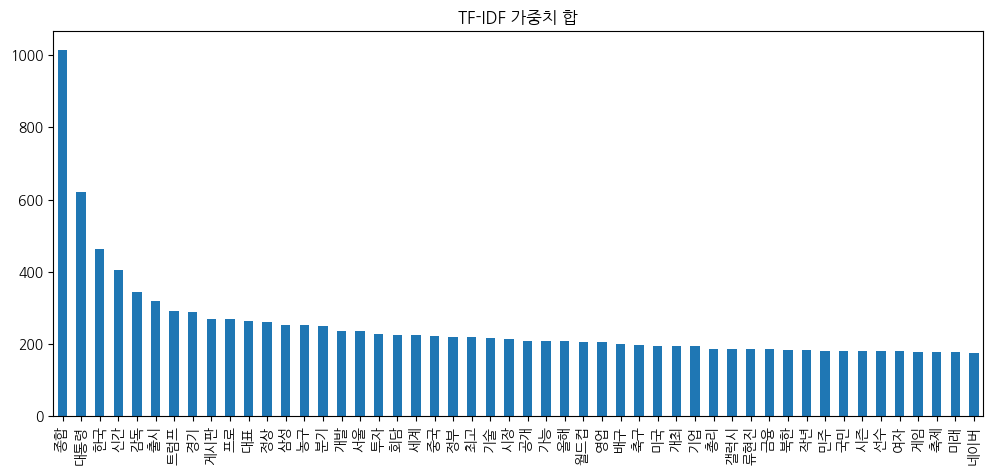

In [189]:
plt.figure(figsize=(12, 5))
plt.title('TF-IDF 가중치 합')
df_x_vect.sum().nlargest(50).plot.bar()

## LDA(LatentDirichletAllocation) 토픽 모델링

In [190]:
from sklearn.decomposition import LatentDirichletAllocation

In [191]:
LDA_model = LatentDirichletAllocation(n_components=4, random_state=2024)
W = LDA_model.fit_transform(df_x_vect)

In [192]:
W

array([[0.07906003, 0.08020812, 0.75772411, 0.08300774],
       [0.10508667, 0.10359158, 0.10359131, 0.68773044],
       [0.08543598, 0.08522997, 0.74438055, 0.0849535 ],
       ...,
       [0.09163786, 0.72458145, 0.09163699, 0.09214371],
       [0.77759845, 0.07405574, 0.07413306, 0.07421276],
       [0.07272328, 0.54733889, 0.07377249, 0.30616534]])

In [193]:
H = LDA_model.components_

In [194]:
H

array([[ 0.25125078, 16.8360492 ,  1.51412063, ..., 13.76132533,
        20.53551794, 70.8383919 ],
       [ 0.25315148,  0.25153628,  0.25079043, ..., 27.1429034 ,
         0.25340427,  0.25348251],
       [ 0.25453669,  0.25213609,  0.26513002, ...,  2.77396337,
         0.25374671,  0.25124071],
       [60.42556886,  0.26226781, 18.68688405, ...,  0.25922356,
         0.25256925,  0.28042339]])

In [195]:
W.shape, H.shape

((45673, 4), (4, 2000))

In [197]:
df_lda_W = pd.DataFrame(W)
df_lda_W['title2'] = df['title2']
df_lda_W['label2'] = df['label']

display(df_lda_W.head(10).style.background_gradient(axis=1))
display(df_lda_W.head(10).style.background_gradient(axis=0))

,0,1,2,3,title2,label2
0,0.079060,0.080208,0.757724,0.083008,유튜브 내달 일 크리에이터 지원 공간 운영,생활문화
1,0.105087,0.103592,0.103591,0.687730,어버이날 맑 남부 지방 옅 황사,생활문화
2,0.085436,0.085230,0.744381,0.084954,내년 국가 평가 때 논문 건수 반영 않,사회
3,0.093381,0.380003,0.428649,0.097966,김명자 신임 과 회장 원로 젊 과학자 지혜 것,사회
4,0.083349,0.085365,0.747936,0.083350,회색 인간 작가 김동식 양 심 백 등 소설 집 출간,생활문화
5,0.092298,0.091743,0.434147,0.381812,야외 방송 액션 캠 전용 요금제,IT과학
6,0.127363,0.652145,0.110452,0.110040,월드컵 태극전사 강 초기 레오강 입 종합,스포츠
7,0.103881,0.103882,0.103881,0.688356,미세먼지 속 출근길,생활문화
8,0.761574,0.079301,0.079425,0.079700,왓츠 앱 원 레바논 민심 총리 사퇴 종합 보,세계
9,0.080734,0.207335,0.633458,0.078473,베트남 경제 고성장 지속 분기 성장,세계


,0,1,2,3,title2,label2
0,0.079060,0.080208,0.757724,0.083008,유튜브 내달 일 크리에이터 지원 공간 운영,생활문화
1,0.105087,0.103592,0.103591,0.687730,어버이날 맑 남부 지방 옅 황사,생활문화
2,0.085436,0.085230,0.744381,0.084954,내년 국가 평가 때 논문 건수 반영 않,사회
3,0.093381,0.380003,0.428649,0.097966,김명자 신임 과 회장 원로 젊 과학자 지혜 것,사회
4,0.083349,0.085365,0.747936,0.083350,회색 인간 작가 김동식 양 심 백 등 소설 집 출간,생활문화
5,0.092298,0.091743,0.434147,0.381812,야외 방송 액션 캠 전용 요금제,IT과학
6,0.127363,0.652145,0.110452,0.110040,월드컵 태극전사 강 초기 레오강 입 종합,스포츠
7,0.103881,0.103882,0.103881,0.688356,미세먼지 속 출근길,생활문화
8,0.761574,0.079301,0.079425,0.079700,왓츠 앱 원 레바논 민심 총리 사퇴 종합 보,세계
9,0.080734,0.207335,0.633458,0.078473,베트남 경제 고성장 지속 분기 성장,세계


In [198]:
df_lda_topic = pd.DataFrame(H, columns=tfidvect.get_feature_names_out())
df_lda_topic

,가격,가결,가계,가구,가능,가동,가빈,가상,가속,가스,...,휴대,휴스턴,휴전,흐리,흑자,흥국생명,흥원,희망,희생자,힐러리
0,0.251251,16.836049,1.514121,0.250453,108.735246,22.202736,0.252190,0.254535,11.963469,9.305173,...,0.254161,0.253331,22.379708,0.250240,0.250727,0.250742,0.250326,13.761325,20.535518,70.838392
1,0.253151,0.251536,0.250790,0.251766,18.628599,5.100555,0.294007,0.254401,0.255426,0.253038,...,0.250615,0.330285,0.250597,0.250210,0.252948,35.038272,0.252163,27.142903,0.253404,0.253483
2,0.254537,0.252136,0.265130,0.254309,38.398560,0.270092,0.251265,34.055086,11.775580,10.621873,...,0.254097,46.588443,0.250746,0.250144,25.821225,0.250251,22.923481,2.773963,0.253747,0.251241
3,60.425569,0.262268,18.686884,34.353190,42.998068,5.166735,19.847796,0.254747,2.827975,0.258972,...,34.598178,0.255573,0.251015,33.610899,0.252751,0.251321,0.252775,0.259224,0.252569,0.280423


In [199]:
df_lda_topic.style.background_gradient()

,가격,가결,가계,가구,가능,가동,가빈,가상,가속,가스,가을,가입,가입자,가족,가지,가짜,가치,간담회,간부,갈등,감독,감사,감소,감시,강경,강남,강력,강릉,강세,강원,강정호,강제,강조,강추위,강풍,강행,강화,개관,개국,개막,개막전,개발,개방,개사,개선,개설,개성,개소,개시,개월,개인,개입,개장,개정,개최,개통,개편,개헌,개헌안,개혁,갤럭시,거래,거래소,거론,거리,거부,거절,거포,걱정,건강,건물,건설,검사,검색,검증,검찰,검토,게시판,게임,겨냥,겨울,격돌,격려,격차,격추,격파,격화,견제,결과,결국,결론,결산,결승,결의,결의안,결장,결정,결제,결합,경계,경고,경기,경기도,경남,경매,경보,경북,경선,경신,경영,경쟁,경쟁력


<Axes: >

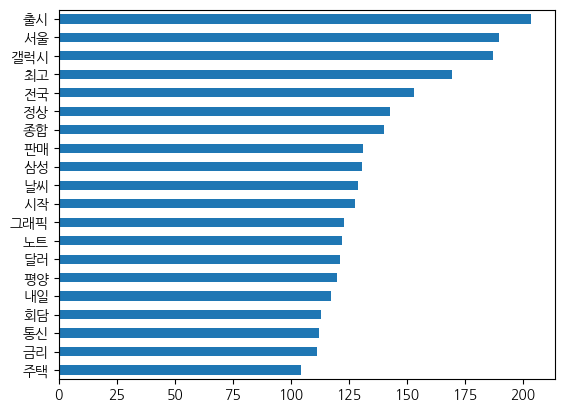

In [202]:
df_lda_topic.loc[3].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

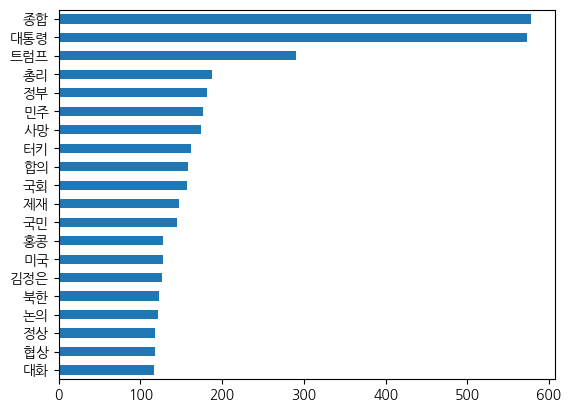

In [203]:
df_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh()

<Axes: >

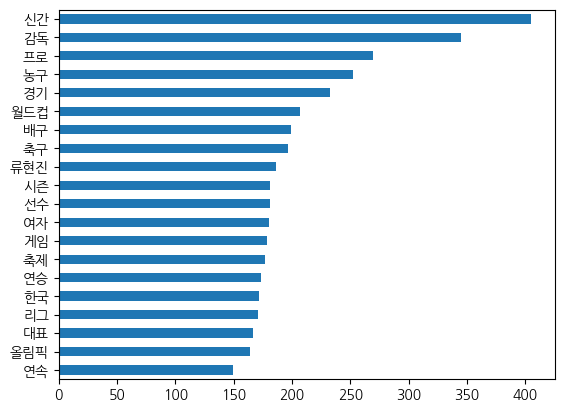

In [204]:
df_lda_topic.loc[1].nlargest(20).sort_values(ascending=True).plot.barh()